In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/test.csv
/kaggle/input/titanic/train.csv
/kaggle/input/titanic/gender_submission.csv


# Hi,fellow kagglers. This is one of my first notebook here in kaggle. I demonstrated the use of a simple Keras Regressor(Neural network) in solving this classic Titanic problem.
 
#           The Data Preparation is same just like other ML models. I imputed the null values and One hot encoded the categorical values.Also I have normalised the dtaa before feeding it to the neural net.Any suggestions are welcome , actually I am looking forward to your hacks to improve the model as well as myself.

In [2]:
#Importing the necessary libraries 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style("darkgrid")

In [3]:
#Loading the Titanic Datasets 

train = pd.read_csv('../input/titanic/train.csv')
test = pd.read_csv('../input/titanic/test.csv')

df=train.copy()
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
# Look at numeric and categorical values separately

df_num = train[["Age", "SibSp", "Parch", "Fare"]]
df_cat = train[["Survived", "Pclass", "Sex", "Ticket", "Cabin", "Embarked"]]

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe11a4798d0>,
      dtype=object)

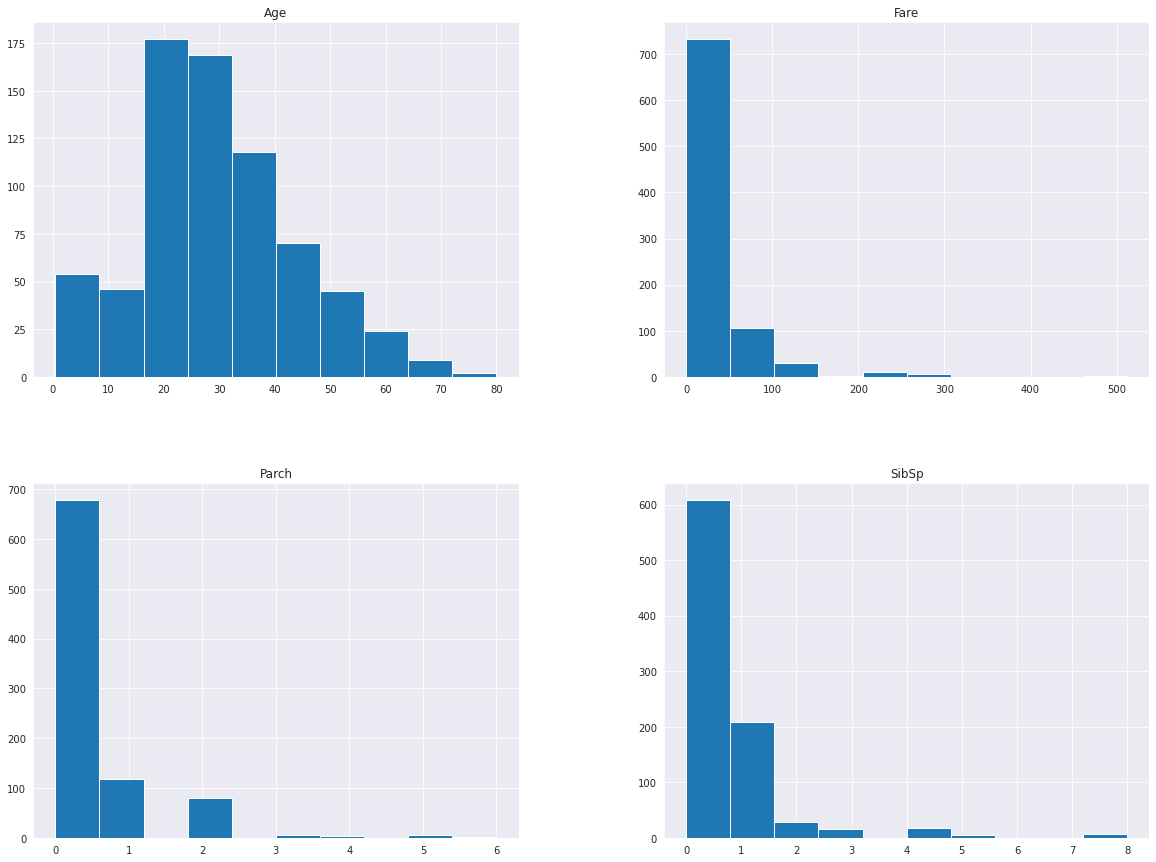

In [7]:
df_num.hist(figsize=(20,15)) 

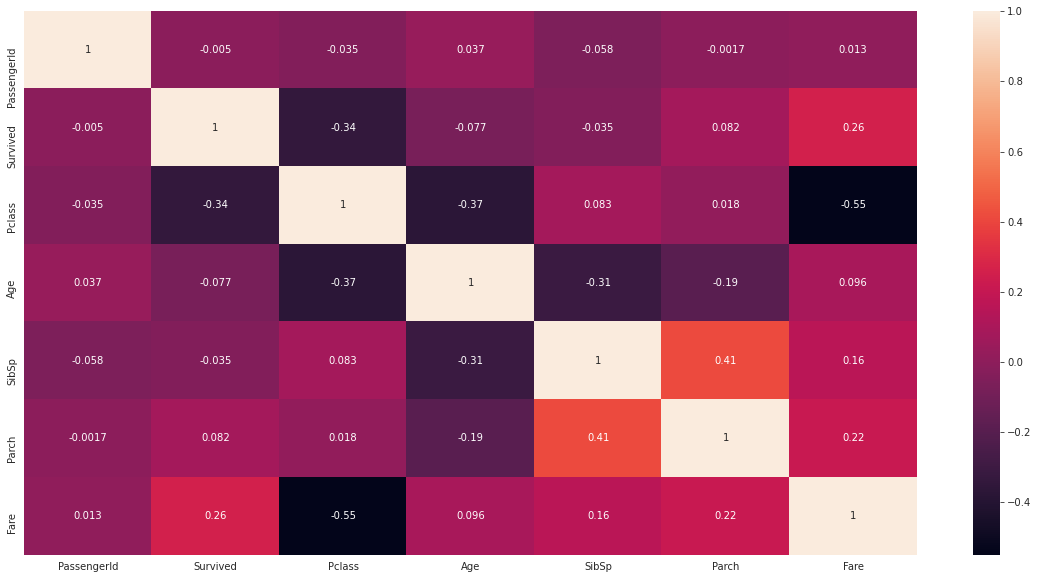

In [8]:
plt.figure(figsize=(20,10)) 
sns.heatmap(df.corr(),annot=True)

In [9]:
df.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


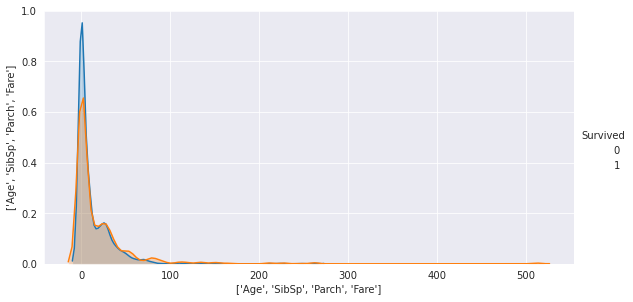

In [10]:
sns.pairplot(df, hue='Survived', vars=  [["Age", "SibSp", "Parch", "Fare"]],height=4,aspect=2)

In [11]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [12]:
df_cat.columns.tolist()

['Survived', 'Pclass', 'Sex', 'Ticket', 'Cabin', 'Embarked']

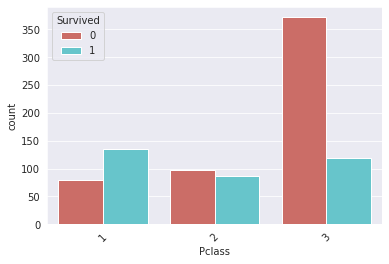

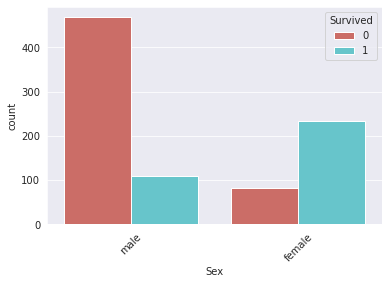

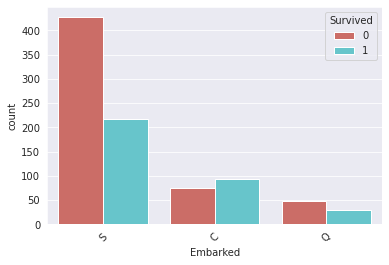

In [13]:
for i in ['Pclass', 'Sex','Embarked']:
    sns.countplot(x=i, data=df, palette='hls', hue='Survived')
    plt.xticks(rotation=45)
    plt.show()


In [14]:
df.drop(['Cabin', 'Name', 'Ticket', 'PassengerId'], axis=1, inplace=True)

In [15]:
print(df.columns)
print(df_num.columns)
print(df_cat.columns)

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')
Index(['Age', 'SibSp', 'Parch', 'Fare'], dtype='object')
Index(['Survived', 'Pclass', 'Sex', 'Ticket', 'Cabin', 'Embarked'], dtype='object')


In [16]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer


num_attribs = ['Age', 'SibSp', 'Parch', 'Fare']
cat_attribs = [ 'Pclass', 'Sex','Embarked']



full_pipeline = ColumnTransformer([
        ("num", StandardScaler(), num_attribs),
        ("cat", OneHotEncoder(), cat_attribs),
    ])

In [17]:
df['Age'] = SimpleImputer(strategy='mean').fit_transform(df[['Age']])

In [18]:
df['Embarked'] = SimpleImputer(strategy='constant',fill_value='S').fit_transform(df[['Embarked']])

In [19]:
X = df[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked']]
y= df['Survived']

X = full_pipeline.fit_transform(X)
print(X.shape)

(891, 12)


In [20]:
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

In [21]:
def larger_model():
 # create model
 km = Sequential()
 km.add(Dense(X.shape[1], input_dim=X.shape[1], kernel_initializer='normal', activation='relu'))
 km.add(Dense(35, kernel_initializer='normal', activation='relu'))
 km.add(Dense(25, kernel_initializer='normal', activation='relu'))
 km.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))
 # Compile model
 km.compile(loss='binary_crossentropy', optimizer='adam')
 return km

# evaluate model with standardized dataset
estimator = KerasRegressor(build_fn=larger_model, epochs=100, batch_size=5, verbose=1)
#kfold = KFold(n_splits=5)
#results = cross_val_score(estimator, X, y, cv=kfold)
#print("Baseline: %.2f (%.2f) " % (results.mean(), results.std()))

In [22]:
estimator.fit(X,y)

Epoch 1/100
179/179 [==============================] - 0s 2ms/step - loss: 0.6189
Epoch 2/100
179/179 [==============================] - 0s 2ms/step - loss: 0.4825
Epoch 3/100
179/179 [==============================] - 0s 2ms/step - loss: 0.4479
Epoch 4/100
179/179 [==============================] - 0s 2ms/step - loss: 0.4330
Epoch 5/100
179/179 [==============================] - 0s 1ms/step - loss: 0.4288
Epoch 6/100
179/179 [==============================] - 0s 2ms/step - loss: 0.4194
Epoch 7/100
179/179 [==============================] - 0s 2ms/step - loss: 0.4197
Epoch 8/100
179/179 [==============================] - 0s 1ms/step - loss: 0.4160
Epoch 9/100
179/179 [==============================] - 0s 1ms/step - loss: 0.4095
Epoch 10/100
179/179 [==============================] - 0s 2ms/step - loss: 0.4118
Epoch 11/100
179/179 [==============================] - 0s 2ms/step - loss: 0.4086
Epoch 12/100
179/179 [==============================] - 0s 1ms/step - loss: 0.4060
Epoch 13/100


In [23]:
test_data = test.drop(['Cabin', 'Name', 'Ticket', 'PassengerId'], axis=1)

In [24]:
test_data['Age'] = SimpleImputer(strategy='mean').fit_transform(test_data[['Age']])
test_data['Fare'] = SimpleImputer(strategy='mean').fit_transform(test_data[['Fare']])

In [25]:
test_data = full_pipeline.fit_transform(test_data)
print(test_data.shape)

(418, 12)


In [26]:
test['Survived'] = estimator.predict(test_data)
#solution = test[['PassengerId', 'Survived']]
test.info()

84/84 [==============================] - 0s 1ms/step
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
 11  Survived     418 non-null    float32
dtypes: float32(1), float64(2), int64(4), object(5)
memory usage: 37.7+ KB


In [27]:
test['Survived'] = test['Survived'].apply(lambda x: round(x,0)).astype('int')
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,0
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,0


In [28]:
solution = test[['PassengerId', 'Survived']]
solution.to_csv("titanic_solution.csv", index=False)